## Khám phá dữ liệu

## Mục lục
- [I. Tổng quan dữ liệu và tóm tắt vấn đề](#i)
    - [1. Thêm thư viện cần thiết và đọc dữ liệu](#i1)
    - [2. Thông tin cơ bản](#i2)
    - [3. Tóm tắt vấn đề cần xử lí](#i3)
- [II. Tiền xử lí cơ bản](#ii)
    - [1. Loại bỏ các dòng có job name là not specified](#ii1)
    - [2. Loại các bài tuyển dụng đăng lại nhiều lần](#ii2)
    - [3. Kiểm tra và xử lý dữ liệu null](#ii3)
    - [4. Chuyển các cột thành các kiểu dữ liệu phù hợp](#ii4)
    - [5. Đưa các cột cần thiết về  kiểu category](#ii5)
    - [6. Loại bỏ các cột không có giá trị trực quan](#ii6)
- [III. Tiền xử lí chuyên sâu](#iii)
    - [1. Xử lý cột Location](#iii1)
    - [2. Xử lý cột Experience](#iii2)
    - [3. Xử lý cột Salary](#iii3)
    - [4. Xử lý cột Industry](#iii4)
- [IV. Dịch các cột cần thiết sang tiếng Anh và tách ra thành danh sách](#iv)
    - [1. Chuyển cột Employment type sang tiếng anh](#iv1)
    - [2. Xử lý cột Welfare](#iv2)
    - [3. Xử lý cột Job Requirements](#iv3)
- [V. Tối ưu dữ liệu để trực quan](#v)
    - [1. Kiểm tra dữ liệu mang giá trị Not specified hay lỗi chính tả](#v1)
    - [2. Sự phân bố của các cột numerical](#v2)
    - [3. Sự phân bố của các cột categorical](#v3)
- [VI. Lưu dữ liệu](#vi)

## I. Tổng quan dữ liệu và tóm tắt vấn dề <a id="i"></a>

### 1. Thêm thư viện cần thiết và đọc dữ liệu <a id="i1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression

Xóa các dòng link bị trùng trong file job_links.txt

In [2]:
'''
# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt
with open('../CollectingData/job_links2.txt', 'r') as f:
    job_links2 = f.read().splitlines()
with open('../CollectingData/job_links.txt', 'r') as f:
    job_links = f.read().splitlines()
with open('../CollectingData/job_links3.txt', 'r') as f:
    job_links3 = f.read().splitlines()
for link in job_links2:
    if link not in job_links:
        job_links3.append(link)
with open('../CollectingData/job_links3.txt', 'w') as f:
    for link in job_links3:
        f.write(link + '\n')
'''

"\n# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt\nwith open('../CollectingData/job_links2.txt', 'r') as f:\n    job_links2 = f.read().splitlines()\nwith open('../CollectingData/job_links.txt', 'r') as f:\n    job_links = f.read().splitlines()\nwith open('../CollectingData/job_links3.txt', 'r') as f:\n    job_links3 = f.read().splitlines()\nfor link in job_links2:\n    if link not in job_links:\n        job_links3.append(link)\nwith open('../CollectingData/job_links3.txt', 'w') as f:\n    for link in job_links3:\n        f.write(link + '\n')\n"

Lấy thêm các link mới cập nhật trên trang careerviet

In [3]:
'''
# Đếm số dòng trong file job_links.txt
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
print(len(job_links))

# Đọc file job_links.txt và xóa các dòng link bị trùng lặp
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
job_links = list(set(job_links))

# Ghi lại vào file job_links.txt
with open('../dataset/job_links.txt', 'w') as f:
    for job_link in job_links:
        f.write(job_link)

print(len(job_links))
'''

"\n# Đếm số dòng trong file job_links.txt\nwith open('../dataset/job_links.txt', 'r') as f:\n    job_links = f.readlines()\nprint(len(job_links))\n\n# Đọc file job_links.txt và xóa các dòng link bị trùng lặp\nwith open('../dataset/job_links.txt', 'r') as f:\n    job_links = f.readlines()\njob_links = list(set(job_links))\n\n# Ghi lại vào file job_links.txt\nwith open('../dataset/job_links.txt', 'w') as f:\n    for job_link in job_links:\n        f.write(job_link)\n\nprint(len(job_links))\n"

In [4]:
# Đọc file csv
data = pd.read_csv('../dataset/job_data_new.csv')
data.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Job Tags,Company URL,Salary,Company Name,Company Address,Company Scale,Company Type,Company Website,Follower,Company Introduction
0,Sales Manager,https://careerviet.vn/vi/tim-viec-lam/sales-ma...,Hồ Chí Minh,25/10/2024,23/11/2024,3 - 5 \n ...,Quản lý,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Đồng phục, Chế độ th...",...,"Giám đốc kinh doanh, Sales Director, Giám đốc ...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[GẤP] Nhân viên Sales Tiếng Trung / Chinese Sa...,https://careerviet.vn/vi/tim-viec-lam/gap-nhan...,Hồ Chí Minh,23/11/2024,17/12/2024,Not specified,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đồng phụ...",...,"sales tiếng trung, chinese sales staff, chines...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not specified,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Not specified,Not specified,Not specified,Not specified,Not specified,Not Found,Not specified,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đào tạo,...",...,"kỹ sư bảo trì, chuyên viên bảo trì, maintenanc...",Not Found,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Bình Định,25/10/2024,23/11/2024,2 - 5 \n ...,Trưởng nhóm / Giám sát,\n ...,Nhân viên chính thức,"Laptop, Chế độ bảo hiểm, Du Lịch, Phụ cấp, Xe ...",...,Giám sát kho,https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,CÔNG TY TNHH WGR INDUSTRIES,"Lô A8, KCN Becamex Bình Định, Khu kinh tế Nhơn...",Not specified,Trách nhiệm hữu hạn,Not specified,169,"WGR Industries Co., Ltd(FACTORY MANUFACTURING ..."
4,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hà Nội,25/10/2024,23/11/2024,Trên 1 \n ...,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...",...,"Giao dịch viên, Teller, Chuyên viên đối ngoại,...",https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,Công ty Cổ phần Chứng khoán Dầu khí (PSI),"Số 18 Lý Thường Kiệt, Quận Hoàn Kiếm, Hà Nội",100-499,Cổ phần,https://www.psi.vn/vi,2.27,PSI là Công ty chứng khoán thuộc Tập đoàn Dầu ...


### 2. Thông tin cơ bản <a id="i2"></a>

#### 2.1 Bộ dữ liệu có bao nhiêu dòng và cột?

In [5]:
data.shape

(26361, 23)

Bộ dữ liệu có 26361 dòng và 23 cột

#### 2.2 Ý nghĩa của mỗi dòng là gì?

Mỗi dòng trong bộ dữ liệu là một vị trí tuyển dụng mà các nhà tuyển dụng đang tìm kiếm. Với các thông tin như: `Tên công việc`, `Địa điểm làm việc`, `Ngày đăng bài`,...

#### 2.3 Dữ liệu có bị trùng lặp không?

In [6]:
data.duplicated().sum()

28

Tiến hành loại bỏ 28 dòng dữ liệu bị trùng lặp

In [7]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26333 entries, 0 to 26360
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Name              26333 non-null  object
 1   Job Link              26333 non-null  object
 2   Location              26333 non-null  object
 3   Update Date           26333 non-null  object
 4   Deadline              26333 non-null  object
 5   Experience            26333 non-null  object
 6   Job Level             26333 non-null  object
 7   Industry              26333 non-null  object
 8   Employment Type       26331 non-null  object
 9   Welfare               26333 non-null  object
 10  Job Description       26333 non-null  object
 11  Job Requirements      26333 non-null  object
 12  Other Information     26333 non-null  object
 13  Job Tags              26333 non-null  object
 14  Company URL           26333 non-null  object
 15  Salary                26333 non-null  obj

Bộ dữ liệu còn 26333 dòng

#### 2.4 Ý nghĩa của mỗi cột là gì?

| Cột               | Mô tả                                                         |
|-------------------|---------------------------------------------------------------|
| Job Name          | Tên công việc                                                 |
| Job Link          | Đường dẫn của job                                             |
| Location          | Địa điểm                                                      |
| Update Date       | Ngày up CV                                                    |
| Deadline          | Hạn nộp CV                                                    |
| Experience        | Kinh nghiệm                                                   |
| Job Level         | Cấp bậc                                                       |
| Industry          | Loại ngành nghề                                               |
| Employment Type   | Hình thức làm việc                                            |
| Welfare           | Phúc lợi                                                      |
| Job Description   | Mô tả công việc                                               |
| Job Requirement   | Yêu cầu công việc                                             |
| Other Information | Thông tin khác                                                |
| Job Tags          | Job Tags                                                      |
| Company URL       | Đường dẫn đến trang công ty                                   |
| Company Name      | Tên công ty                                                   |
| Company Address   | Địa điểm của công ty                                          |
| Company Scale     | Quy mô của công ty                                            |
| Company Type      | Loại hình hoạt động                                           |
| Company Website   | Website của công ty                                           |
| Followers         | Số lượng người theo dõi                                       |
| Company Intro     | Phần giới thiệu của công ty                                   |
| Salary            | Lương                                                         |

#### 2.5 Loại dữ liệu của từng cột là gì? Có phù hợp hay không?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26333 entries, 0 to 26360
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Name              26333 non-null  object
 1   Job Link              26333 non-null  object
 2   Location              26333 non-null  object
 3   Update Date           26333 non-null  object
 4   Deadline              26333 non-null  object
 5   Experience            26333 non-null  object
 6   Job Level             26333 non-null  object
 7   Industry              26333 non-null  object
 8   Employment Type       26331 non-null  object
 9   Welfare               26333 non-null  object
 10  Job Description       26333 non-null  object
 11  Job Requirements      26333 non-null  object
 12  Other Information     26333 non-null  object
 13  Job Tags              26333 non-null  object
 14  Company URL           26333 non-null  object
 15  Salary                26333 non-null  obj

In [9]:
data.isnull().sum()

Job Name                   0
Job Link                   0
Location                   0
Update Date                0
Deadline                   0
Experience                 0
Job Level                  0
Industry                   0
Employment Type            2
Welfare                    0
Job Description            0
Job Requirements           0
Other Information          0
Job Tags                   0
Company URL                0
Salary                     0
Company Name            1099
Company Address         1103
Company Scale           1099
Company Type            1099
Company Website         1099
Follower                1099
Company Introduction    1100
dtype: int64

Bộ dữ liệu chứa khá nhiều các dòng bị thiếu thông tin liên quan đến công ty của các vị trí tuyển dụng tương ứng. Tuy nhiên tùy vào mục đích sử dụng mà xem xét có bỏ hết những mẫu dữ liệu bị thiếu hay không.

### 3. Tóm tắt vấn đề cần xử lí <a id="i3"></a>

| Cột               | Mô tả                                                         | Vấn đề                              |
|-------------------|---------------------------------------------------------------|-------------------------------------|
| Job Name          | Tên công việc                                                 |Xóa các dòng mang g/trị Not Specified|
| Job Link          | Đường dẫn của job                                             |Xóa lặp dựa trên Link của job        |
| Location          | Địa điểm                                                      |                                     |
| Update Date       | Ngày up CV                                                    |Chuyển về Datetime                   |
| Deadline          | Hạn nộp CV                                                    |Chuyển về Datetime                   |
| Experience        | Kinh nghiệm                                                   |Chỉ lấy phần số bên trái (min)       |
| Job Level         | Cấp bậc                                                       |Loại bỏ dữ liệu trống (Not specific) |
| Industry          | Loại ngành nghề                                               |Xóa khoảng trống và tách thành dsach |
| Employment Type   | Hình thức làm việc                                            |Tiến hành dịch                       |
| Welfare           | Phúc lợi                                                      |Dịch và tách thành dsach             |
| Job Description   | Mô tả công việc                                               |Gộp với 2 cột bên dưới để trích xuất thêm thông tin|
| Job Requirement   | Yêu cầu công việc                                             |Gộp                                  |
| Other Information | Thông tin khác                                                |Gộp                                  |
| Job Tags          | Job Tags                                                      |                                     |
| Company URL       | Đường dẫn đến trang công ty                                   |                                     |
| Company Name      | Tên công ty                                                   |                                     |
| Company Address   | Địa điểm của công ty                                          |                                     |
| Company Scale     | Quy mô của công ty                                            |                                     |
| Company Type      | Loại hình hoạt động                                           |Xóa các dòng bị lỗi dấu              |
| Company Website   | Website của công ty                                           |                                     |
| Followers         | Số lượng người theo dõi                                       |Chuyển về dạng số nguyên             |
| Company Intro     | Phần giới thiệu của công ty                                   |                                     |
| Salary            | Lương                                                         |Định dạng và ép kiểu về kiểu dữ liệu phù hợp              |

## II. Tiền xử lí cơ bản <a id="ii"></a>

### 1. Loại bỏ các dòng có job name là not specified <a id="ii1"></a>

In [10]:
print(data.shape[0])

# Bỏ các dòng có Job Name là Not specified
data = data[data['Job Name'] != 'Not specified']

print(data.shape[0])

26333
25608


### 2. Loại các bài tuyển dụng đăng lại nhiều lần <a id="ii2"></a>

Nhóm nhận thấy một số công ty tạo ra bài đăng tuyển dụng giống như trước nhưng thay đổi một chút sau vài ngày -> tiến hành xóa dựa trên phần mô tả công việc, cấp bậc, địa điểm công việc, tên công ty

In [11]:
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['Job Description','Job Level','Company Name','Location'], keep='first')
data.shape

(20020, 23)

### 3. Kiểm tra và xử lý dữ liệu null <a id="ii3"></a>

<Axes: >

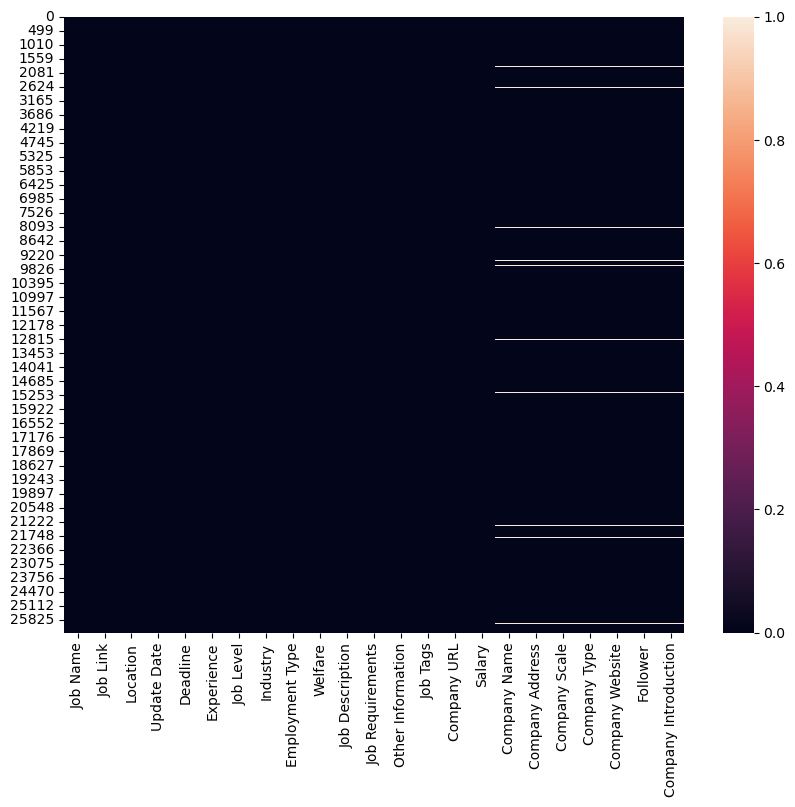

In [12]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())

Với mục đích trực quan dữ liệu được chính xác hơn, như đã nói ở trên, nhóm sẽ tiến hành xóa các dòng dữ liệu null này

In [13]:
# Xóa dòng có giá trị null
data = data.dropna()

19749


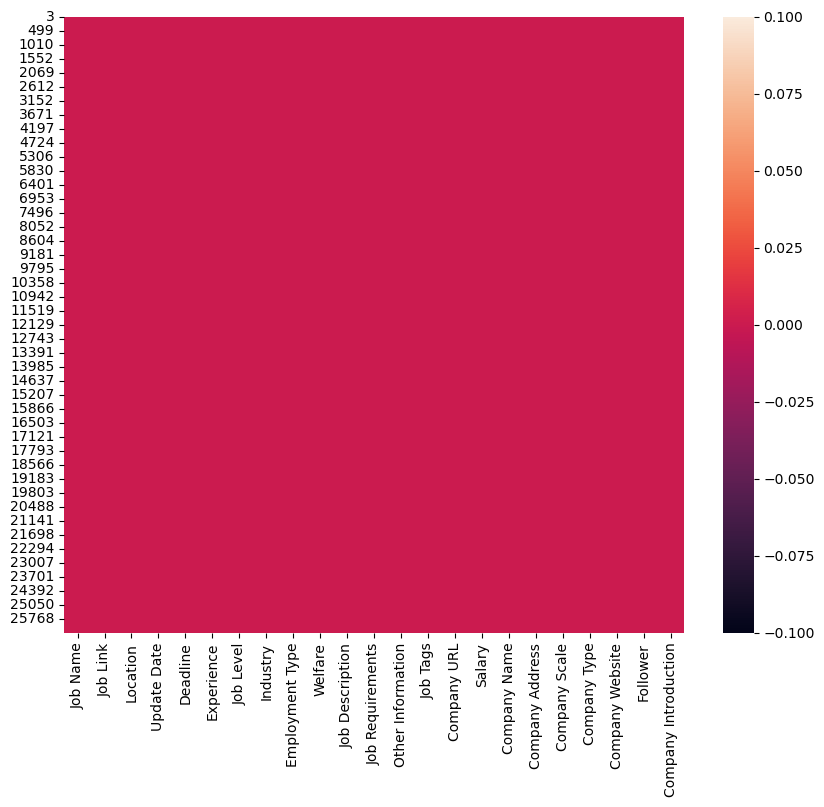

In [14]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())
print(data.shape[0])

### 4. Chuyển các cột thành các kiểu dữ liệu phù hợp <a id="ii4"></a>


| Cột               | Kiểu dữ liệu      |
|-------------------|-------------------|
| Location          | object            |
| Experience        | int64             |
| Job Level         | object            |
| Industry          | object            |
| Employment Type   | object            |
| Welfare           | object            |
| Job Requirements  | object            |
| Salary            | object            |
| Company Name      | object            |
| Company Type      | object            |
| Update Date       | datetime64[ns]    |
| Deadline          | datetime64[ns]    |
| Update Date_day   | int32             |
| Update Date_month | int32             |
| Update Date_year  | int32             |
| Deadline_day      | int32             |
| Deadline_month    | int32             |
| Deadline_year     | int32             |

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19749 entries, 3 to 26359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Name              19749 non-null  object
 1   Job Link              19749 non-null  object
 2   Location              19749 non-null  object
 3   Update Date           19749 non-null  object
 4   Deadline              19749 non-null  object
 5   Experience            19749 non-null  object
 6   Job Level             19749 non-null  object
 7   Industry              19749 non-null  object
 8   Employment Type       19749 non-null  object
 9   Welfare               19749 non-null  object
 10  Job Description       19749 non-null  object
 11  Job Requirements      19749 non-null  object
 12  Other Information     19749 non-null  object
 13  Job Tags              19749 non-null  object
 14  Company URL           19749 non-null  object
 15  Salary                19749 non-null  obj

Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm

In [16]:
# Bỏ các dòng mà cột Update Date hoặc Deadline có giá trị là Not specified
data = data[(data['Update Date'] != 'Not specified') & (data['Deadline'] != 'Not specified')]
data.shape

# Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm
data['Update Date'] = pd.to_datetime(data['Update Date'], dayfirst=True, errors='coerce')
data['Deadline'] = pd.to_datetime(data['Deadline'], dayfirst=True, errors='coerce')

data['Update Date_day'] = data['Update Date'].dt.day
data['Update Date_month'] = data['Update Date'].dt.month
data['Update Date_year'] = data['Update Date'].dt.year

data['Deadline_day'] = data['Deadline'].dt.day
data['Deadline_month'] = data['Deadline'].dt.month
data['Deadline_year'] = data['Deadline'].dt.year

### 5. Đưa các cột cần thiết về  kiểu category <a id="ii5"></a>

### 6. Loại bỏ các cột không có giá trị trực quan <a id="ii6"></a>

## III. Tiền xử lí chuyên sâu <a id="iii"></a>

In [17]:
# Thư viện cần thiết
# from Trans_Tokenize import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
# from sklearn.model_selection import train_test_split
# import math
import unicodedata
# import swifter
# import nltk
# from concurrent.futures import ThreadPoolExecutor
# nltk.download('stopwords')

### 1. Xử lý cột Location <a id="iii1"></a>

Chỉ lấy địa điểm ở đầu một chuỗi ở mỗi dòng của cột Location, vì đây là nơi đầu não công ty tọa lạc

In [18]:
def remove_diacritics(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [19]:
data['Location'] = data['Location'].apply(lambda x: x.title())

data['Location'] = data['Location'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x.strip())
data['Location'] = data['Location'].apply(remove_diacritics)

data = data[~data['Location'].isin(['Not Specified', 'Not Found'])]

### 2. Xử lý cột Experience <a id="iii2"></a>

Lấy giá trị bên trái của mẫu dữ liệu vì chủ yếu quan tâm đến năm kinh nghiệm tối thiểu cho vị trí tuyển dụng 

VD: 3-5 năm thì lấy 3

In [20]:
def extract_number(value):
    if 'Chưa có kinh nghiệm' in value:
        return 0  # Nếu "Chưa có kinh nghiệm" trả về 0
    elif match := re.match(r'(\d+)\s*-\s*\d+', value):  # Nếu định dạng là number - number
        return int(match.group(1))  # Lấy số đầu tiên
    elif match := re.search(r'\d+', value):  # Nếu chỉ có một số duy nhất
        return int(match.group(0))  # Lấy số đó
    return 0

In [21]:
data["Experience"]=data["Experience"].str.replace("\n","",regex=True)
data["Experience"]=data["Experience"].str.replace("Năm","",regex=True)
data["Experience"]=data["Experience"].str.replace(r"\s+",' ',regex=True).str.strip()
data["Experience"]=data["Experience"].apply(extract_number)

### 3. Xử lý cột Salary <a id="iii3"></a>

In [22]:
import re
import math

def extract_salary(value):
    # Loại bỏ dấu phẩy trong số (để xử lý 700,000 => 700000)
    value = value.replace(',', '')
    value = value.replace('.', '')
    
    # Tách các con số trong chuỗi
    numbers = re.findall(r'\d+', value)
    numbers = [int(num) for num in numbers]  # Chuyển các chuỗi số thành integer
    
    # Nếu có khoảng lương
    if len(numbers) > 1:
        # Nếu khoảng chênh lệch giữa hai giá trị quá lớn (ví dụ: 700 - 1,000 USD)
        if (numbers[1] - numbers[0]) / numbers[0] > 0.5:
            salary = numbers[0] + (numbers[1] - numbers[0]) / 4  # Đoán mức lương trung bình trong khoảng
        else:
            salary = sum(numbers) / len(numbers)  
    elif numbers:
        # Trường hợp chỉ có một số
        salary = sum(numbers) / len(numbers)
    else:
        return 'Cạnh tranh'
    
    # Kiểm tra các đơn vị tiền tệ và chuyển đổi
    if any(unit in value.lower() for unit in ['triệu', 'tr']):
        salary *= 1_000_000  
    elif any(unit in value.lower() for unit in ['usd', 'đô la', '$', 'đô']):
        salary *= 23_000  

    
    if any(unit in value.lower() for unit in ['năm', 'year']):
        salary /= 12  

    # Làm tròn kết quả về bội số gần nhất của 100,000
    return math.ceil(round(salary, -5))

In [23]:
data = data.copy()

data['Salary'] = data['Salary'].replace(
    ['0','Thỏa thuận', 'Negotiable', 'Not Specified', 'Not Found', 'not found', 'Not specifield'], 
    np.nan)
data['Salary'] = data['Salary'].apply(extract_salary)
data['Salary'].value_counts()

Salary
Cạnh tranh    8291
12500000      1030
17500000       767
13500000       507
11000000       473
              ... 
30200000         1
49200000         1
68800000         1
69000000         1
900000           1
Name: count, Length: 280, dtype: int64

### 4. Xử lý cột Industry <a id="iii4"></a>

In [24]:
data['Industry'] = data['Industry'].astype(str)
data['Industry'] = data['Industry'].str.replace(r'\s+', '', regex=True) # Phục vụ cho việc định dạng khi xuất file csv
print(data['Industry'])

3        Sảnxuất/Vậnhànhsảnxuất,Đồgỗ,Thumua/Vậttư
4              Bảohiểm,Chứngkhoán,Dịchvụkháchhàng
6                         Kếtoán/Kiểmtoán,Thốngkê
7         Dịchvụkháchhàng,Ngânhàng,Tàichính/Đầutư
8             Điện/Điệntử/Điệnlạnh,Bảotrì/Sửachữa
                           ...                   
26355            Bánlẻ/Bánsỉ,Bấtđộngsản,Ngànhkhác
26356             CNTT-Phầnmềm,CNTT-Phầncứng/Mạng
26357            Bánlẻ/Bánsỉ,Bấtđộngsản,Ngànhkhác
26358       Ngànhkhác,Giáodục/Đàotạo,CNTT-Phầnmềm
26359            Bánlẻ/Bánsỉ,Bấtđộngsản,Ngànhkhác
Name: Industry, Length: 19749, dtype: object


In [25]:
# Hàm tách các ngành trong chuỗi và trả về một danh sách
def extract_industries(text):
    industries = [industry.strip() for industry in text.split(',')]
    return industries

all_industries = data['Industry'].apply(extract_industries).explode()

# Đếm số lần xuất hiện của từng ngành
industry_counts = all_industries.value_counts()

# Lấy danh sách tên các ngành từ industry_counts
industry_names = industry_counts.index.tolist()

# In danh sách các ngành
print(industry_counts)
print(industry_names)

Industry
Bánhàng/Kinhdoanh          6098
Ngânhàng                   2720
Tiếpthị/Marketing          2467
Bánlẻ/Bánsỉ                2263
Tàichính/Đầutư             1944
                           ... 
Khoángsản                    25
Phichínhphủ/Philợinhuận      16
LâmNghiệp                    15
Thủylợi                      15
Thưviện                      11
Name: count, Length: 68, dtype: int64
['Bánhàng/Kinhdoanh', 'Ngânhàng', 'Tiếpthị/Marketing', 'Bánlẻ/Bánsỉ', 'Tàichính/Đầutư', 'Kếtoán/Kiểmtoán', 'Dịchvụkháchhàng', 'Sảnxuất/Vậnhànhsảnxuất', 'Điện/Điệntử/Điệnlạnh', 'Cơkhí/Ôtô/Tựđộnghóa', 'Xâydựng', 'Hànhchính/Thưký', 'Tưvấn', 'CNTT-Phầnmềm', 'Nhânsự', 'Bấtđộngsản', 'Giáodục/Đàotạo', 'Vậnchuyển/Giaonhận/Khovận', 'Quảnlýđiềuhành', 'Ytế/Chămsócsứckhỏe', 'Thựcphẩm&Đồuống', 'Tiếpthịtrựctuyến', 'Quảnlýchấtlượng(QA/QC)', 'Bảotrì/Sửachữa', 'Quảngcáo/Đốingoại/TruyềnThông', 'Dệtmay/Dagiày/Thờitrang', 'Xuấtnhậpkhẩu', 'Dượcphẩm', 'Nhàhàng/Kháchsạn', 'Mỹthuật/Nghệthuật/Thiếtkế', 'Luật/Pháplý', '

## IV. Dịch các cột cần thiết sang tiếng Anh và tách ra thành danh sách <a id="iv"></a>

### 1. Chuyển cột Employment type sang tiếng anh <a id="iv1"></a>

In [26]:
# Tạo từ điển translation_dict
translation_dict = {
    'Thực tập': 'Internship',
    'Bán thời gian': 'Part-time',
    'Nhân viên chính thức': 'Official',
    'Thời vụ/ Nghề tự do': 'Seasonal/Freelance ',
}

def translate_employment_type(text, translation_dict):
    for key, value in translation_dict.items():
        text = text.replace(key, value)
    return text

# Áp dụng hàm vào cột 'Employment Type'
data['Employment Type'] = data['Employment Type'].apply(lambda x: translate_employment_type(x, translation_dict))
data['Employment Type'].value_counts()

Employment Type
Official                                                18855
Internship                                                451
Part-time                                                 106
Seasonal/Freelance                                         72
Official, Part-time                                        62
Official, Internship                                       49
Part-time, Seasonal/Freelance                              35
Official, Seasonal/Freelance                               34
Part-time, Internship                                      27
Part-time, Seasonal/Freelance , Internship                 21
Official, Part-time, Seasonal/Freelance , Internship       15
Official, Part-time, Internship                             8
Official, Part-time, Seasonal/Freelance                     7
Official, Seasonal/Freelance , Internship                   4
Seasonal/Freelance , Internship                             3
Name: count, dtype: int64

### 2. Xử lý cột Welfare <a id="iv2"></a>

Dùng lại hàm phân tách trên cho cột Welfare vì tính chất dữ liệu của 2 cột Industry và Welfare là như nhau

In [27]:
all_welfares = data['Welfare'].apply(extract_industries).explode()
welfare_counts = all_welfares.value_counts()

# Lấy danh sách các phúc lợi từ welfare_counts
welfare_names = welfare_counts.index.tolist()

# In danh sách các ngành
print(welfare_counts)
print(welfare_names)

Welfare
Chế độ bảo hiểm       18504
Chế độ thưởng         18478
Đào tạo               18429
Tăng lương            17743
Chăm sóc sức khỏe     16074
Du Lịch               16041
Nghỉ phép năm         14335
Phụ cấp               12242
Đồng phục              8959
Công tác phí           8455
Laptop                 6590
Phụ cấp thâm niên      5423
CLB thể thao           3083
Du lịch nước ngoài     2151
Xe đưa đón             2132
Not specified           320
Name: count, dtype: int64
['Chế độ bảo hiểm', 'Chế độ thưởng', 'Đào tạo', 'Tăng lương', 'Chăm sóc sức khỏe', 'Du Lịch', 'Nghỉ phép năm', 'Phụ cấp', 'Đồng phục', 'Công tác phí', 'Laptop', 'Phụ cấp thâm niên', 'CLB thể thao', 'Du lịch nước ngoài', 'Xe đưa đón', 'Not specified']


Tạo từ điển ánh xạ các phúc lợi sang tiếng Anh để gom nhóm

In [28]:
welfare_translation_dict = {
    'Chế độ thưởng': 'bonus',
    'Chế độ bảo hiểm': 'insurance',
    'Đào tạo': 'training',
    'Tăng lương': 'salary_increase',
    'Chăm sóc sức khỏe': 'healthcare',
    'Du Lịch': 'travel',
    'Nghỉ phép năm': 'annual_leave',
    'Phụ cấp': 'allowance',
    'Đồng phục': 'uniform',
    'Công tác phí': 'business_trip_expenses',
    'Laptop': 'laptop',
    'Phụ cấp thâm niên': 'seniority_allowance',
    'CLB thể thao': 'sports_club',
    'Du lịch nước ngoài': 'overseas_travel',
    'Xe đưa đón': 'shuttle_service',
    'Not specified': 'not_specified'
}

data['Welfare'] = data['Welfare'].apply(lambda x: translate_employment_type(x, welfare_translation_dict))

### 3. Xử lý 3 cột Job Description, Job Requirements, Other Information <a id="iv3"></a>

Nhận thấy các thông tin ở 3 cột này không thống nhất về cấu trúc, chẳng hạn yêu cầu ngoại ngữ có thể ghi bằng tiếng Anh, tiếng Việt,..., có thể nằm ở phần mô tả công việc của vị trí tuyển dụng này nhưng ở các vị trí tuyển dụng khác sẽ nằm ở phần thông tin bổ sung -> Tiến hành xử lí cùng lúc 3 cột để có được thông tin đầy đủ về các thông tin cần thiết

Chuyển dữ liệu 3 cột trên về dạng chữ thường 

In [29]:
data['Job Description'] = data['Job Description'].astype(str).str.lower()
data['Job Requirements'] = data['Job Requirements'].astype(str).str.lower()
data['Other Information'] = data['Other Information'].astype(str).str.lower()

Tạo cột mới Language requirement, xác định xem ngoại ngữ có được yêu cầu cho công việc hay không

In [30]:
language_keywords = [
    # Tiếng Việt
    'tiếng anh', 'tiếng trung', 'tiếng nhật', 'tiếng hàn', 'tiếng pháp', 'tiếng đức', 'tiếng nga', 'tiếng tây ban nha',
    'tiếng ý', 'tiếng bồ đào nha', 'tiếng ả rập', 'tiếng thái', 'tiếng việt', 'tiếng ấn độ', 'tiếng ba lan', 'tiếng thụy điển',
    'tiếng hà lan', 'tiếng na uy', 'tiếng phạn', 'tiếng la tinh', 'tiếng hy lạp', 'tiếng do thái', 'tiếng séc', 'tiếng hungary', 'nước ngoài',
    
    'kỹ năng ngoại ngữ', 'trình độ ngoại ngữ', 'chứng chỉ ngoại ngữ', 'giao tiếp quốc tế', 'giao tiếp đa văn hóa',
    'phiên dịch viên', 'biên dịch viên', 'giảng viên ngôn ngữ', 'giáo viên ngoại ngữ',
    'chuyên gia ngôn ngữ', 'nhà ngôn ngữ học', 'thông dịch viên', 'giảng dạy ngoại ngữ',
    'toeic', 'ielts', 'toefl', 'hsk', 'jlpt', 'topik', 'delf', 'dalf', 'testdaf', 'torfl',

    # English keywords
    'english', 'chinese', 'japanese', 'korean', 'french', 'german', 'russian', 'spanish', 'language', 'communication',
    'foreign language', 'multilingual',
    'language certification', 'language skills', 'bilingual', 'trilingual', 'native english speaker'
]


# Define a function to check for language keywords in the text
def has_language_requirements(text):
    text = text.lower()  # Convert text to lowercase
    # Check if any keyword is in the text
    return 1 if any(keyword in text for keyword in language_keywords) else 0

# Apply the function directly to create the new column
data['Language requirement'] = data['Job Requirements'].astype(str).apply(has_language_requirements)

Tạo cột bằng cấp (Education Levels) xác định bằng cấp được yêu cầu

In [31]:
# Định nghĩa từ điển trình độ học vấn
education_levels_dict = {
    # Tiếng Việt
    'trung học': 1,
    'trung cấp': 2,
    'cao đẳng': 3,
    'đại học': 4,
    'sau đại học': 5,
    
    # Tiếng Anh
    'college': 3,
    'university': 4,
    'bachelor’s degree': 4,
    'master': 5,
    'phd': 5,
}

# Hàm tìm kiếm trình độ học vấn từ các cột
def get_education_level(row):
    # Kiểm tra trong cột 'Other Information' theo thứ tự từ điển
    for keyword, level in education_levels_dict.items():
        if keyword.lower() in row['Other Information'].lower():
            return level
    
    # Nếu không tìm thấy trong 'Other Information', kiểm tra trong 'Job Requirements'
    for keyword, level in education_levels_dict.items():
        if keyword.lower() in row['Job Requirements'].lower():
            return level
    
    # Nếu không tìm thấy trình độ học vấn, trả về NaN hoặc 0
    return 0  # hoặc có thể là NaN nếu bạn muốn

# Áp dụng hàm trên để tạo cột 'Education Levels'
data['Education Levels'] = data.apply(get_education_level, axis=1)

Dịch cột Job Requirements sang tiếng anh

In [32]:
# Thư viện cho phần dịch
from Trans_Tokenize import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
import math
import unicodedata
import swifter
import nltk
from concurrent.futures import ThreadPoolExecutor
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quocn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
data = parallelize_column(data, column_name='Job Requirements')

Đã xử lý xong 395 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 790 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1185 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1580 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1975 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 2370 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 2765 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3160 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3555 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3950 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 4345 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 4740 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5135 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5530 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5925 trên tổng số 1974

Tạo cột mới Gender Requirement 

In [34]:
# Tạo một hàm để kiểm tra nội dung trong cột 'Job Requirements'
def detect_gender(job_requirements):
    job_requirements_lower = str(job_requirements).lower()
    if 'male' in job_requirements_lower and 'female' in job_requirements_lower and job_requirements_lower.count('male') > 1:
        return 'both'
    elif 'female' in job_requirements_lower:
        return 'female'
    elif 'male' in job_requirements_lower:
        return 'male'
    else:
        return 'both'

# Áp dụng hàm để tạo cột 'Gender'
data['Gender Requirement'] = data['Job Requirements'].apply(detect_gender)

Sắp xếp, Loại bỏ các cột đã xử lí

In [35]:
# Danh sách các cột cần loại bỏ
columns_to_drop = ['Job Requirements', 'Other Information', 'Job Description']

# Loại bỏ các cột
data = data.drop(columns=columns_to_drop)

columns = data.columns.tolist()
columns.remove('Education Levels')
columns.insert(3, 'Education Levels')
# Di chuyển 'Salary' vào vị trí cuối cùng
columns.remove('Salary')
columns.append('Salary')

# Sắp xếp lại DataFrame với thứ tự cột mới
raw_data = data[columns]

## V. Tối ưu dữ liệu để trực quan <a id="v"></a>

### 1. Kiểm tra dữ liệu mang giá trị Not specified hoặc lỗi chính tả <a id="v1"></a>

<Axes: >

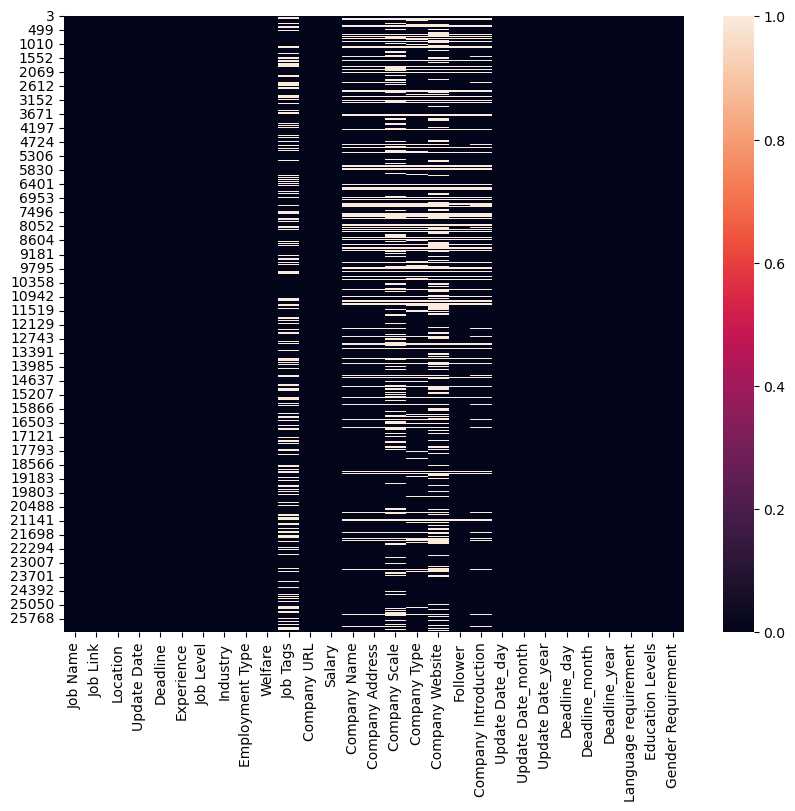

In [36]:
# Biểu đồ heatmap cho các giá trị 'Not specified'
plt.subplots(figsize=(10,8))
sns.heatmap(data.isin(['Not specified']))

Nhận thấy có quá nhiều giá trị Not specified ở các cột Job Tags, Company Address, Company Scale, Company Website, Company Introduction, Followers

In [37]:
# Tiến hành loại bỏ 
data.drop("Job Tags", axis=1, inplace=True)
data.drop("Company Address", axis=1, inplace=True)
data.drop("Company Scale", axis=1, inplace=True)
data.drop("Company Website", axis=1, inplace=True)
data.drop("Company Introduction", axis=1, inplace=True)
data.drop("Follower", axis=1, inplace=True)

In [38]:
# In ra số lượng dòng mà cột Company Name có giá trị là Not specified trong khi cột Company Type không có giá trị là Not specified
print(data[(data['Company Name'] == 'Not specified') & (data['Company Type'] != 'Not specified')].shape[0])

# Tiến hành xóa các dòng đó
data = data[~((data['Company Name'] == 'Not specified') & (data['Company Type'] != 'Not specified'))]

# Ngược lại
print(data[(data['Company Name'] != 'Not specified') & (data['Company Type'] == 'Not specified')].shape[0])
data = data[~((data['Company Name'] != 'Not specified') & (data['Company Type'] == 'Not specified'))]

63
696


<Axes: >

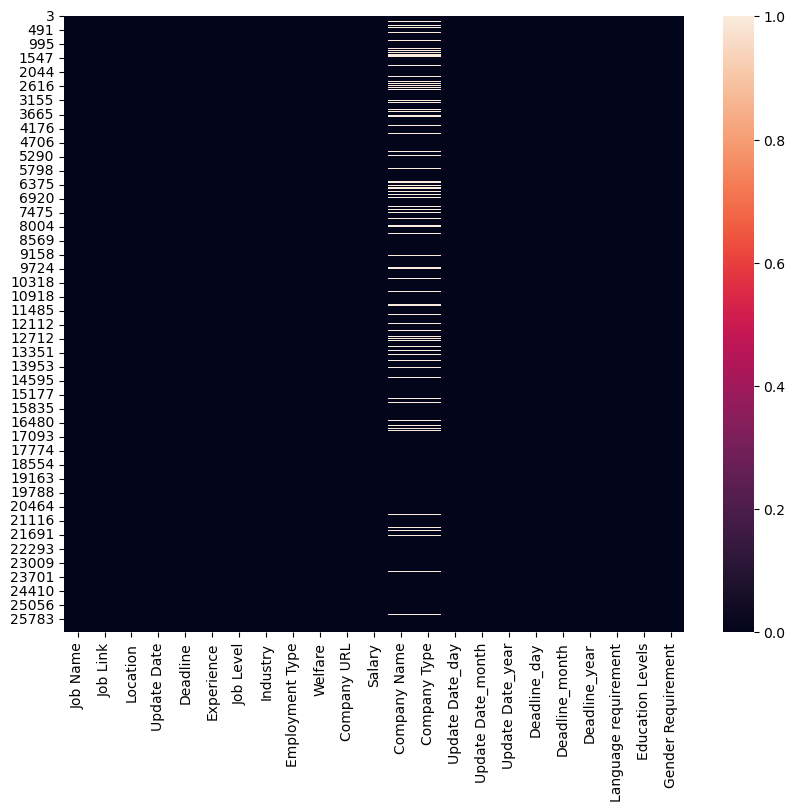

In [39]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isin(['Not specified']))

Giữ lại cột Company Name cho mục đích phân loại các công việc tuyển dụng thuộc và không thuộc bất kì một công ty nào

Thay các giá trị Not specified bằng giá trị 'Freelance recruiter', tạm gọi là Freelance recruiter vì đây là mẫu dữ liệu lấy từ các bài đăng tuyển dụng không thuộc về một công ty nào hết. Freelance recruiter là những người chuyên tìm kiếm và tuyển dụng các ứng viên mà bản thân họ không thuộc về bất kì một công ty nào.

In [40]:
# Thay các giá trị Not specified bằng giá trị 'Headhunters' trong cột Company Name
data['Company Name'] = data['Company Name'].replace('Not specified', 'Freelance recruiter')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18990 entries, 3 to 26359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Job Name              18990 non-null  object        
 1   Job Link              18990 non-null  object        
 2   Location              18990 non-null  object        
 3   Update Date           18990 non-null  datetime64[ns]
 4   Deadline              18990 non-null  datetime64[ns]
 5   Experience            18990 non-null  int64         
 6   Job Level             18990 non-null  object        
 7   Industry              18990 non-null  object        
 8   Employment Type       18990 non-null  object        
 9   Welfare               18990 non-null  object        
 10  Company URL           18990 non-null  object        
 11  Salary                18990 non-null  object        
 12  Company Name          18990 non-null  object        
 13  Company Type         

In [69]:
# In ra các giá trị của cột 'Company Type'
print(data['Company Type'].value_counts())

Company Type
Cổ phần                8726
Trách nhiệm hữu hạn    4644
Not specified          2679
100% vốn nước ngoài    2029
Công ty đa quốc gia     424
Cá nhân                 246
Liên doanh              174
Nhà nước                 63
Trach nhi?m h?u h?n       3
Cong ty da qu?c gia       2
Name: count, dtype: int64


Nhận thấy rằng có tổng 5 dòng dữ liệu bị lỗi chính tả ở cột loại hình công ty, vì số lượng rất ít nên tiến hành xóa để tránh ảnh hưởng đến phần trực quan phân bố

In [70]:
value_counts = data['Company Type'].value_counts()
values_to_remove = value_counts[(value_counts < 10)].index
data = data[~data['Company Type'].isin(values_to_remove)]

### 2. Với các cột thuộc kiểu numerical, các giá trị phân bố như thế nào? <a id="v2"></a>

In [42]:
# Copy sang một dataframe mới để xem phân bố giá trị
data_copy = data.copy()

# Chỉ lấy các dòng dữ liệu có Salary khác 'Cạnh tranh'
data_copy = data_copy[data_copy['Salary'] != 'Cạnh tranh']

# Làm sạch dữ liệu Salary trước khi chuyển đổi
data_copy['Salary'] = data_copy['Salary'].astype(str)
data_copy['Salary'] = data_copy['Salary'].str.replace(r'[^\d.]', '', regex=True)

# Chuyển cột Salary về dạng int
data_copy['Salary'] = pd.to_numeric(data_copy['Salary'], errors='coerce')
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 6 to 26358
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Job Name              11017 non-null  object        
 1   Job Link              11017 non-null  object        
 2   Location              11017 non-null  object        
 3   Update Date           11017 non-null  datetime64[ns]
 4   Deadline              11017 non-null  datetime64[ns]
 5   Experience            11017 non-null  int64         
 6   Job Level             11017 non-null  object        
 7   Industry              11017 non-null  object        
 8   Employment Type       11017 non-null  object        
 9   Welfare               11017 non-null  object        
 10  Company URL           11017 non-null  object        
 11  Salary                11017 non-null  int64         
 12  Company Name          11017 non-null  object        
 13  Company Type         

In [43]:
cols = ['Salary', 'Experience']
numeric_df = pd.DataFrame()

for col in cols:
    numeric_df[col] = data_copy[col].describe()
numeric_df

,Salary,Experience
count,1.101700e+04,11017.000000
mean,1.856126e+08,1.493601
std,7.454544e+09,1.466888
min,9.000000e+05,0.000000
25%,1.050000e+07,0.000000
50%,1.380000e+07,1.000000
75%,1.880000e+07,2.000000
max,4.500075e+11,30.000000


Nhận thấy có nhiều mốc lương cao đột biến -> chiêu trò của nhà tuyển dụng trong việc câu kéo lượt quan tâm theo dõi từ những người đang muốn kiếm công việc lương cao -> Tiến hành xem các điểm dữ liệu này như giá trị ngoại lai và xóa

In [44]:
# Xóa các giá trị ngoại lai của cột Salary bằng tứ phân vị
Q1 = data_copy['Salary'].quantile(0.25)
Q3 = data_copy['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm số lượng giá trị ngoại lai
outliers = data_copy[(data_copy['Salary'] < lower_bound) | (data_copy['Salary'] > upper_bound)]
print(outliers.shape)

# Lọc bỏ các giá trị ngoại lai
data_copy = data_copy[(data_copy['Salary'] >= lower_bound) & (data_copy['Salary'] <= upper_bound)]

(890, 23)


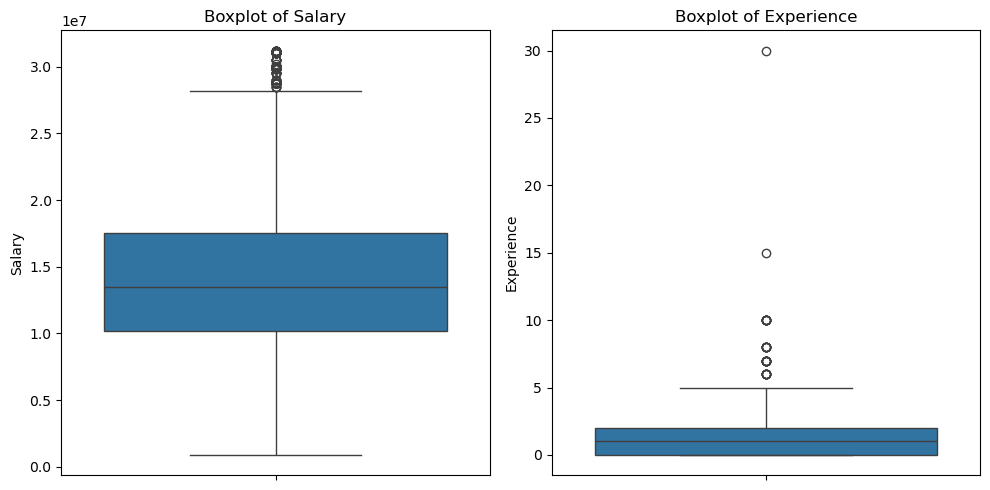

In [45]:
plt.figure(figsize=(10, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i) 
    sns.boxplot(y=data_copy[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

Có thể thấy các giá trị phân bố hợp lí, có rất nhiều công việc có mức lương rất cao, cũng như số năm kinh nghiệm tối thiểu lên đến 30 năm

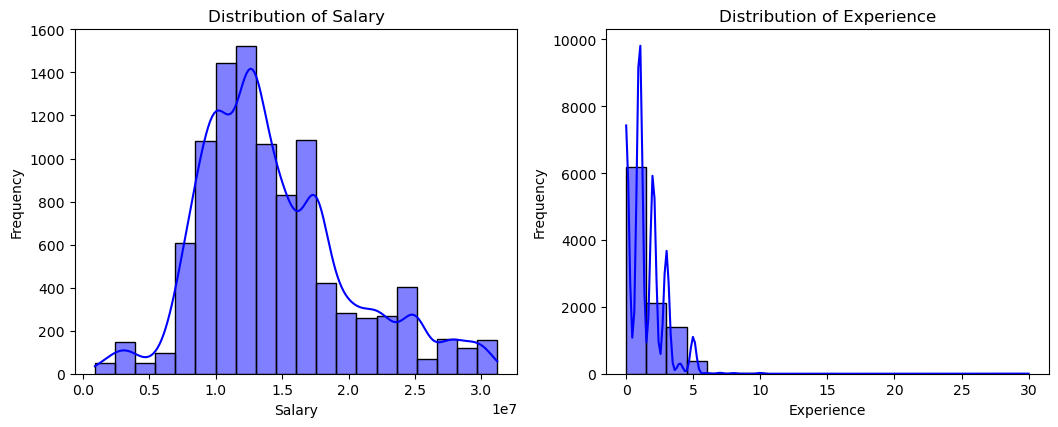

In [46]:
cols = ['Salary', 'Experience']
plt.figure(figsize=(16, 12))

for i, column in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_copy[column], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

- Cột `Salary` có phân phối không đều. Có thể hiểu ngày nay, các công việc ngày càng đa dạng với các mức lương khác nhau. Và tùy thuộc vào các yếu tố khác mà mức lương sẽ bị ảnh hưởng
- Cột `Experience` có phân phối lệch phải chứng tỏ số năm kinh nghiệm tối thiểu cho một vị trí tuyển dụng tập trung ở mức vừa phải (chủ yếu ở mức 1-5 năm), và có 1 số ít công việc yêu trên 5 năm kinh nghiệm.

### 3. Với các cột thuộc kiểu categorical, các giá trị phân bố như thế nào? <a id="v3"></a>

##### Đối với dữ liệu dạng số

        Education Levels  Language requirement  Job Level
count              18990                 18990      18990
unique                 6                     2          8
top                    4                     0  Nhân viên
freq                8997                 11779      13511


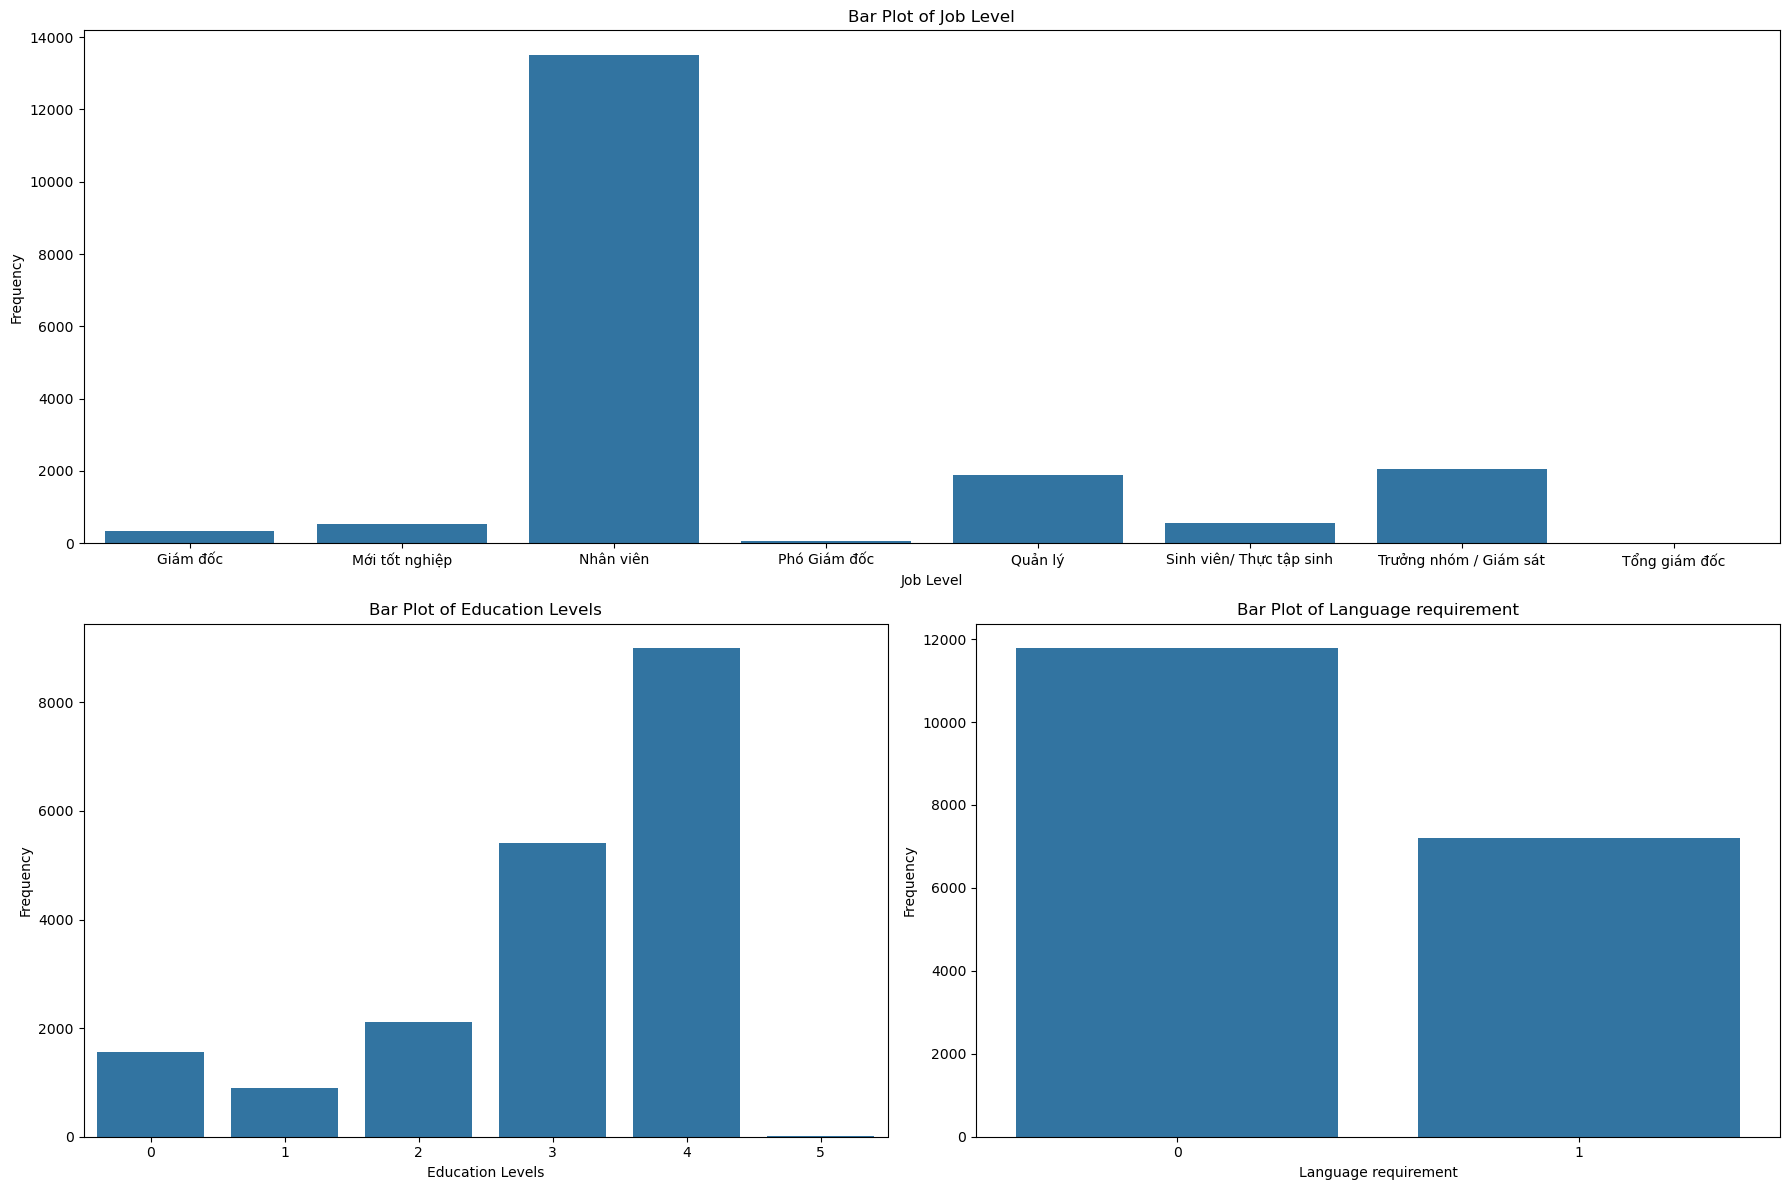

In [47]:
cols = ['Education Levels','Language requirement', 'Job Level'] 

data[cols] = data[cols].astype('category')
print(data[cols].describe())

plt.figure(figsize=(18, 12))
gs = GridSpec(2, 2, height_ratios=[1, 1])

ax0 = plt.subplot(gs[0, :])
sns.barplot(
    x=data['Job Level'].value_counts().index,  
    y=data['Job Level'].value_counts().values, 
)
plt.title(f'Bar Plot of Job Level')
plt.xlabel('Job Level')
plt.ylabel('Frequency')

ax1 = plt.subplot(gs[1, 0])
sns.barplot(
    x=data['Education Levels'].value_counts().index,  
    y=data['Education Levels'].value_counts().values, 
)
plt.title(f'Bar Plot of Education Levels')
plt.xlabel('Education Levels')
plt.ylabel('Frequency')

ax2 = plt.subplot(gs[1, 1])
sns.barplot(
    x=data['Language requirement'].value_counts().index,  
    y=data['Language requirement'].value_counts().values, 
)
plt.title(f'Bar Plot of Language requirement')
plt.xlabel('Language requirement')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Các cột categorical dạng số phân bố hợp lí, không có gì bất thường.

##### Đối với dữ liệu dạng chuỗi.

Các dữ liệu dạng chuỗi bao gồm các cột `Location`, `Industry`, `Employment Type`, `Welfare`, `Gender Requirement`, `Company Type`. Tuy nhiên chỉ trực quan được cho các cột `Employment Type`, `Gender Requirement`, `Company Type` vì lí do quá tải nội dung hiển thị cho các cột còn lại (ví dụ như cột Location có đến hơn 50 tỉnh nên khi trực quan để xem phân bố dữ liệu sẽ làm chữ đè lên nhau, ... -> làm giảm hiệu quả trực quan)

In [54]:
# Hàm tách các loại hình công việc trong chuỗi và trả về một danh sách
def extract_employtype(text):
    employtypes = [types.strip() for types in text.split(',')]
    return employtypes

all_emtype = data['Employment Type'].apply(extract_employtype).explode()

# Đếm số lần xuất hiện của từng loại hình công việc
type_counts = all_emtype.value_counts()

# Lấy danh sách tên các loại hình công việc từ type_counts
type_names = type_counts.index.tolist()

       Company Type Gender Requirement
count         18985              18985
unique            8                  3
top         Cổ phần               both
freq           8726              17470


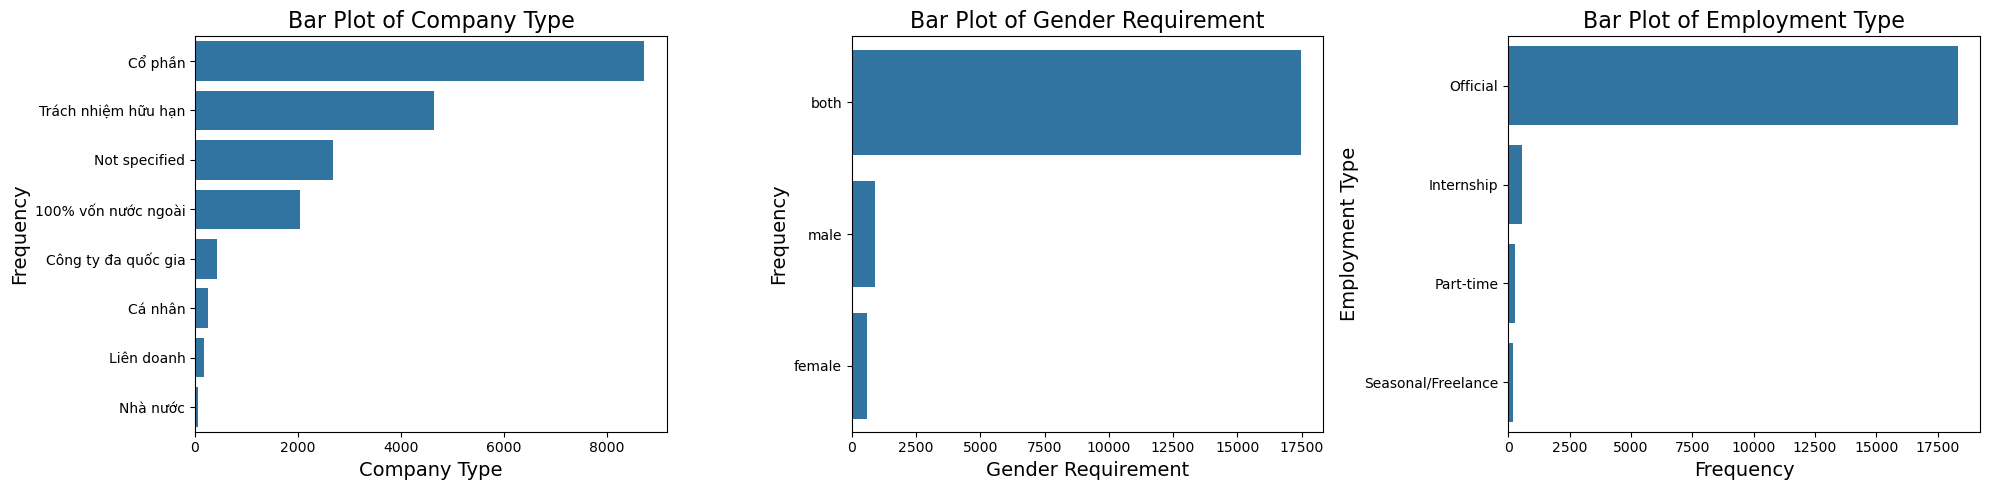

In [72]:
cols = ['Company Type', 'Gender Requirement'] 
print(data[cols].describe())


fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

# Vẽ biểu đồ cho 'Company Type' và 'Gender Requirement'
for i, col in enumerate(cols):
    value_counts = data[col].value_counts().sort_values(ascending=False)
    sns.barplot(
        y=value_counts.index,  
        x=value_counts.values, 
        ax=axes[i]
    )
    axes[i].set_title(f'Bar Plot of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)

# Vẽ biểu đồ cho 'Employment Type'
sns.barplot(y=type_names, x=type_counts, ax=axes[2])
axes[2].set_title('Bar Plot of Employment Type', fontsize=16)
axes[2].set_xlabel('Frequency', fontsize=14)
axes[2].set_ylabel('Employment Type', fontsize=14)


plt.tight_layout()
plt.show()

Ta nhận thấy dữ liệu của các cột dạng số phân bố hợp lí cho một vị trí tuyển dụng, những loại hình công việc như chính thức (official), loại hình công ty như Cổ phần, hay một vị trí tuyển dụng phù hợp cho cả nam và nữ đều khá phổ biến ta đều biết đến dĩ nhiên sẽ chiếm tỉ lệ lớn trong phân phối tương ứng

Đối với các cột còn lại, ta xem sự phân bố giá trị qua:

In [50]:
# Kiểm tra các giá trị của cột Location
print(data['Location'].value_counts())

# Kiểm tra các giá trị của cột Industry
print(data['Industry'].value_counts())

# Kiểm tra các giá trị của cột Welfare
print(data['Welfare'].value_counts())

Location
Ho Chi Minh     6924
Ha Noi          6221
Binh Duong       959
Đong Nai         696
Long An          400
                ... 
Bangkok            1
Vientiane          1
Svay Rieng         1
Kratie             1
Kuala Lumpur       1
Name: count, Length: 84, dtype: int64
Industry
Kếtoán/Kiểmtoán                                        416
Bánhàng/Kinhdoanh,Ngânhàng,Tàichính/Đầutư              372
Bánhàng/Kinhdoanh                                      329
Tiếpthị/Marketing,Bánlẻ/Bánsỉ,Bánhàng/Kinhdoanh        319
Ngânhàng,Tàichính/Đầutư                                267
                                                      ... 
Biênphiêndịch,CNTT-Phầnmềm,Bánhàng/Kinhdoanh             1
Hànhchính/Thưký,Hànggiadụng/Chămsóccánhân,Nhânsự         1
Bưuchínhviễnthông,Xâydựng,Mỹthuật/Nghệthuật/Thiếtkế      1
Quảnlýđiềuhành,Chứngkhoán,Tàichính/Đầutư                 1
Bánhàng/Kinhdoanh,Thumua/Vậttư,Bánlẻ/Bánsỉ               1
Name: count, Length: 4144, dtype: int64
Welfare
insurance, trave

Có thể thấy dữ liệu các cột categorical dạng chuỗi phân bố hợp lí. Không có điều gì bất thường.

## VI. Lưu dữ liệu <a id="vi"></a>

In [73]:
# Lưu dữ liệu vào file csv
data.to_csv('../dataset/data_for_visual.csv', index=False, encoding='utf-8-sig')